In [1]:
from collections import defaultdict
import numpy as np
import matplotlib.pyplot as plt
from math import pi
import pandas as pd
import seaborn as sns

In [12]:
csv = pd.read_csv('data/org/motion_data_user1_scene3.csv')

In [13]:
csv

,timestamp,biosignal_0,biosignal_1,biosignal_2,biosignal_3,biosignal_4,biosignal_5,biosignal_6,biosignal_7,acceleration_x,...,predicted_orientation_y,predicted_orientation_z,predicted_orientation_w,predicted_orientation_yaw,predicted_orientation_pitch,predicted_orientation_roll,predicted_projection_left,predicted_projection_top,predicted_projection_right,predicted_projection_bottom
0,1371432477542,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.017567,...,0.014192,0.030190,0.994452,0.034313,-0.200947,0.057245,-1.0,1.0,1.0,-1.0
1,1371436278012,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.036721,...,0.010547,0.028824,0.994892,0.026574,-0.193463,0.055352,-1.0,1.0,1.0,-1.0
2,1371456315397,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.012778,...,0.006761,0.025921,0.995346,0.018282,-0.185929,0.050370,-1.0,1.0,1.0,-1.0
3,1371468877546,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.007990,...,0.003042,0.023969,0.995749,0.010331,-0.178309,0.047210,-1.0,1.0,1.0,-1.0
4,1371480335540,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.043904,...,-0.000667,0.022210,0.996195,0.002418,-0.168845,0.044378,-1.0,1.0,1.0,-1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
18979,1610089061270,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.308861,...,-0.229385,0.011884,0.966265,-0.462593,0.232799,-0.030486,-1.0,1.0,1.0,-1.0
18980,1610100653817,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.249005,...,-0.227760,0.012670,0.966616,-0.459447,0.233583,-0.028667,-1.0,1.0,1.0,-1.0
18981,1610113332499,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.205908,...,-0.226228,0.012764,0.966925,-0.456330,0.234478,-0.028307,-1.0,1.0,1.0,-1.0
18982,1610124380241,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.205908,...,-0.224261,0.013271,0.967429,-0.452445,0.233901,-0.026655,-1.0,1.0,1.0,-1.0


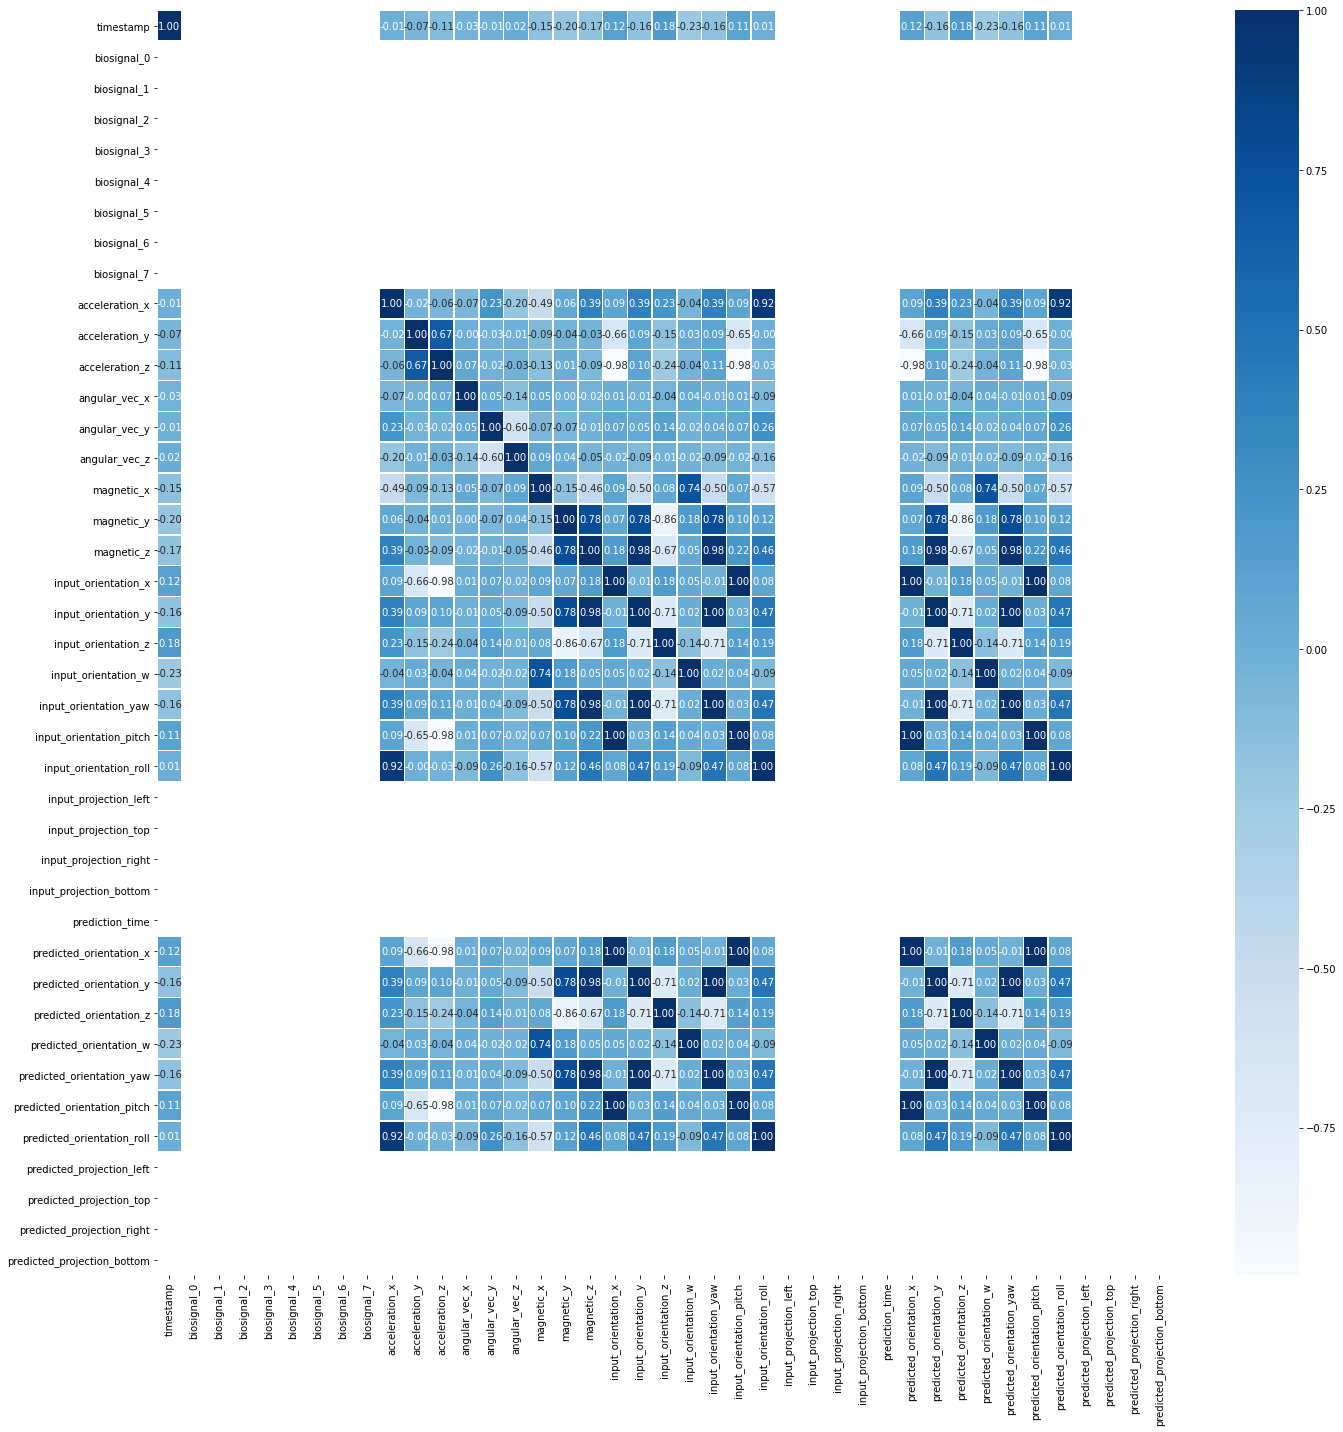

In [14]:
plt.figure(figsize=(20, 20))
sns.heatmap(csv.corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
#plt.title(f'data/1108/user{u}_scene{s}_{t}.csv')
plt.tight_layout()
#plt.savefig(f'img/heatmap/user{u}_scene{s}_{t}.png')
plt.show()

In [15]:
csv.columns

Index(['timestamp', 'biosignal_0', 'biosignal_1', 'biosignal_2', 'biosignal_3',
       'biosignal_4', 'biosignal_5', 'biosignal_6', 'biosignal_7',
       'acceleration_x', 'acceleration_y', 'acceleration_z', 'angular_vec_x',
       'angular_vec_y', 'angular_vec_z', 'magnetic_x', 'magnetic_y',
       'magnetic_z', 'input_orientation_x', 'input_orientation_y',
       'input_orientation_z', 'input_orientation_w', 'input_orientation_yaw',
       'input_orientation_pitch', 'input_orientation_roll',
       'input_projection_left', 'input_projection_top',
       'input_projection_right', 'input_projection_bottom', 'prediction_time',
       'predicted_orientation_x', 'predicted_orientation_y',
       'predicted_orientation_z', 'predicted_orientation_w',
       'predicted_orientation_yaw', 'predicted_orientation_pitch',
       'predicted_orientation_roll', 'predicted_projection_left',
       'predicted_projection_top', 'predicted_projection_right',
       'predicted_projection_bottom'],
      d

In [16]:
COLUMNS = ['timestamp', 'acceleration_x', 'acceleration_y', 'acceleration_z', 'angular_vec_x',
       'angular_vec_y', 'angular_vec_z', 'magnetic_x', 'magnetic_y',
       'magnetic_z', 'input_orientation_x', 'input_orientation_y',
       'input_orientation_z', 'input_orientation_w', 'input_orientation_yaw',
       'input_orientation_pitch', 'input_orientation_roll',
       'predicted_orientation_x', 'predicted_orientation_y',
       'predicted_orientation_z', 'predicted_orientation_w',
       'predicted_orientation_yaw', 'predicted_orientation_pitch',
       'predicted_orientation_roll']

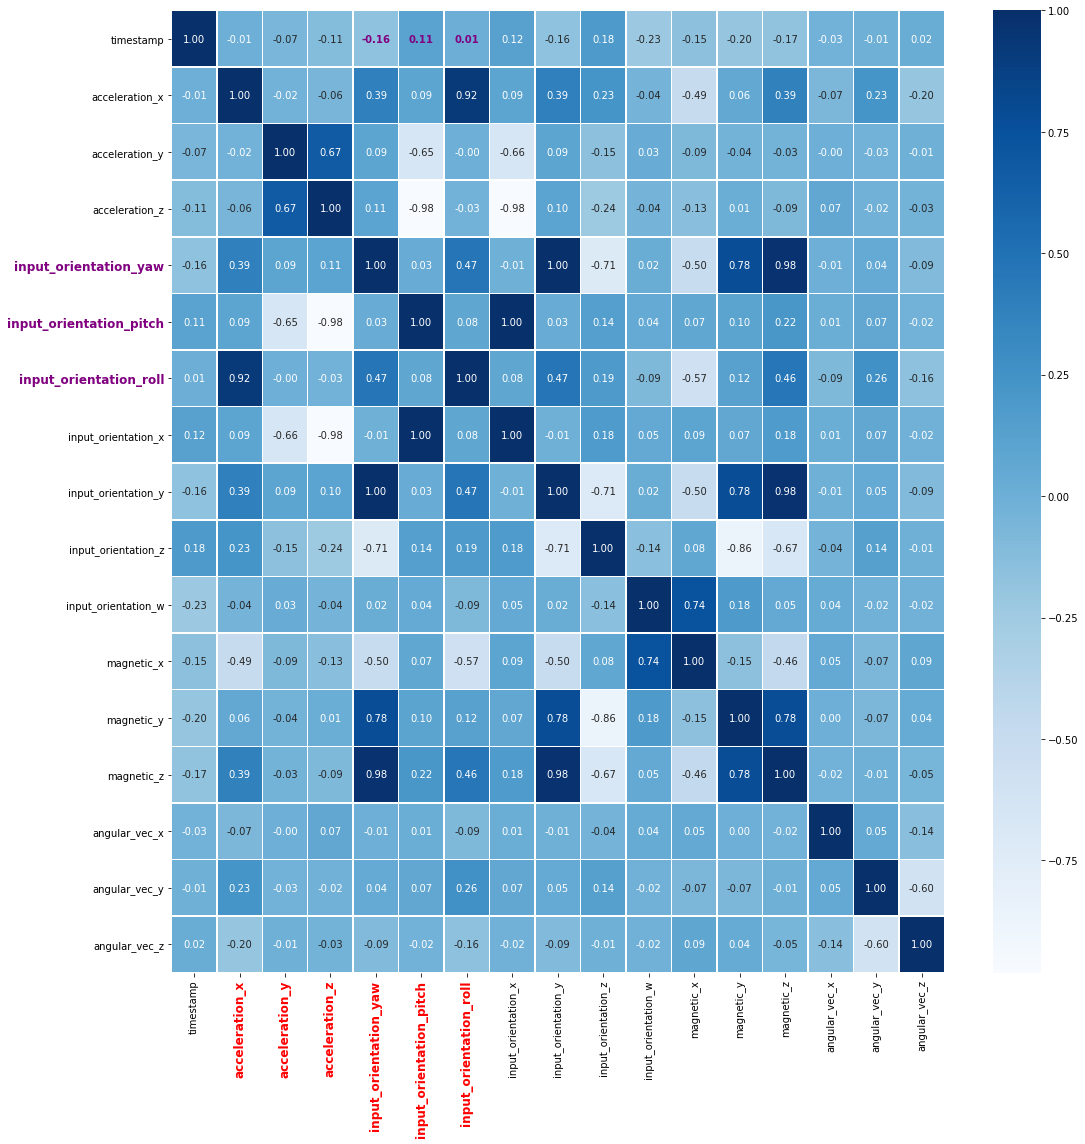

In [31]:
COLUMNS = ['timestamp', 'acceleration_x', 'acceleration_y', 'acceleration_z', 
           'input_orientation_yaw', 'input_orientation_pitch', 'input_orientation_roll',
           'input_orientation_x', 'input_orientation_y', 'input_orientation_z', 'input_orientation_w',
           'magnetic_x', 'magnetic_y', 'magnetic_z',
           'angular_vec_x', 'angular_vec_y', 'angular_vec_z']

plt.figure(figsize=(16, 16))

ax = sns.heatmap(csv[COLUMNS].corr(), annot=True, fmt='.2f', linewidths=.5, cmap='Blues')
for lab, annot in zip(ax.get_yticklabels(), ax.texts):
    text = lab.get_text()
    if text in ['input_orientation_yaw', 'input_orientation_pitch', 'input_orientation_roll']:
        # set the properties of the ticklabel
        lab.set_weight('bold')
        lab.set_size(12)
        lab.set_color('purple')
        # set the properties of the heatmap annot
        annot.set_weight('bold')
        #annot.set_size(20)
        annot.set_color('purple')
for lab, annot in zip(ax.get_xticklabels(), ax.texts):
    text = lab.get_text()
    if text in ['acceleration_x', 'acceleration_y', 'acceleration_z']:
        lab.set_weight('bold')
        lab.set_size(12)
        lab.set_color('red')
    elif text in ['input_orientation_yaw', 'input_orientation_pitch', 'input_orientation_roll']:
        lab.set_weight('bold')
        lab.set_size(12)
        lab.set_color('red')
        
#plt.title(f'data/1108/user{u}_scene{s}_{t}.csv')
plt.tight_layout()
#plt.savefig(f'img/heatmap/user{u}_scene{s}_{t}.png')
plt.show()

# 데이터 끊어진거 보이기

In [21]:
csv = pd.read_csv('data/org/motion_data_user2_scene3.csv')

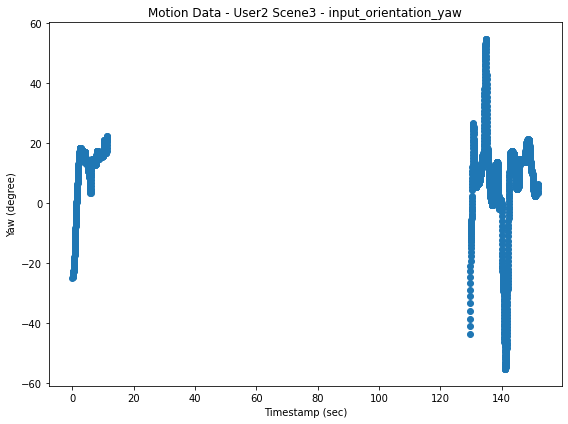

In [22]:
beggining = csv.timestamp[0]
s = 0
t = 2000

plt.figure(figsize=(8, 6))
plt.scatter((csv.timestamp[s:t] - beggining) / 705600000, csv.input_orientation_yaw[s:t] * 180 / pi)
plt.ylabel('Yaw (degree)')
plt.xlabel('Timestamp (sec)')
plt.title('Motion Data - User2 Scene3 - input_orientation_yaw')
plt.tight_layout()
plt.savefig('temp/test2.png')
plt.show()

# 전체 그래프 그리기

In [107]:
P = np.load('results4/0014-CRNNC_Hardswish-win_120-epoch_50-batch_size_256/result-P.npy')
X = np.load('results4/0014-CRNNC_Hardswish-win_120-epoch_50-batch_size_256/result-X.npy')[:, -1, :3]
Y = np.load('results4/0014-CRNNC_Hardswish-win_120-epoch_50-batch_size_256/result-Y.npy')
G = np.load('results4_gan/0002/data-epoch141.npz')['P']

In [108]:
P.shape, X.shape, Y.shape, G.shape

((53327, 3), (53327, 3), (53327, 3), (53424, 3))

In [109]:
dX = 60 * (X[:-1] - X[1:])

In [110]:
CRP = []
for i, dx in enumerate(dX):
    CRP.append(X[i] + dx * 0.3)
CRP = np.stack(CRP)

In [111]:
CRP.shape

(53326, 3)

In [112]:
ddX = 60 * (dX[:-1] - dX[1:])

In [113]:
CAP = []
for i, ddx in enumerate(ddX):
    CAP.append(X[i] + 0.3 * dX[i] + 0.3 ** 2 / 2 * ddx)
CAP = np.stack(CAP)

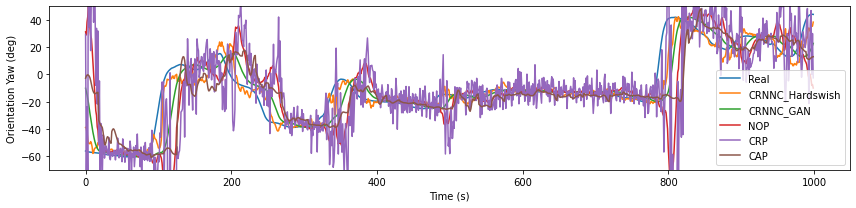

In [114]:
s = 9000
t = 10000

plt.figure(figsize=(12, 3))
plt.plot(Y[s:t, 0])
plt.plot(P[s:t, 0])
plt.plot(X[s:t, 0])
plt.plot(CRP[s:t, 0])
plt.plot(CAP[s:t, 0])
plt.plot(G[s:t, 0])
plt.legend(['Real', 'CRNNC_Hardswish', 'CRNNC_GAN', 'NOP', 'CRP', 'CAP'])
plt.ylabel('Orientation Yaw (deg)')
plt.xlabel('Time (s)')
plt.ylim(-70, 50)
plt.tight_layout()
plt.show()

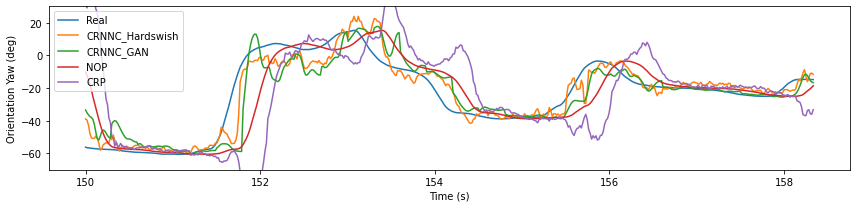

In [115]:
s = 9000
t = 9500
T = np.linspace(s / 60, t / 60, t-s)

plt.figure(figsize=(12, 3))
plt.plot(T, Y[s:t, 0])
plt.plot(T, P[s:t, 0])
plt.plot(T, G[s+18:t+18, 0])
plt.plot(T, X[s:t, 0])
plt.plot(T, CRP[s:t, 0])
plt.legend(['Real', 'CRNNC_Hardswish', 'CRNNC_GAN', 'NOP', 'CRP'])
plt.ylabel('Orientation Yaw (deg)')
plt.xlabel('Time (s)')
plt.ylim(-70, 30)
plt.tight_layout()
plt.savefig('temp/test3.png')
plt.show()